# EDA FOR GEELY AUTOMOBILE SERVICES

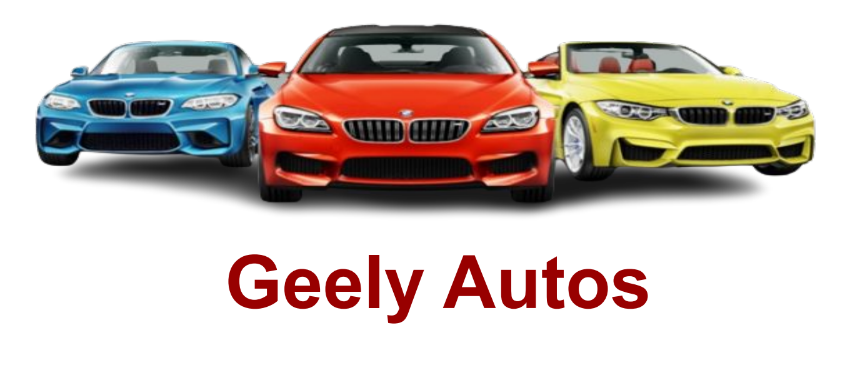

In [20]:
image = Image.open(r'C:\Users\ACER SPIN3\Downloads\geely.png')
display(image)


## Problem Statement
A Chinese automobile company Geely Auto aspires to enter the Nigerian market by setting up its manufacturing unit and producing cars locally to compete with their Nigerian, US and European counterparts.
They have contacted you, a Data Scientist to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the Nigerian market, since those may be very different from the Chinese market. 
>The company wants to know:
- Which variables are significant in predicting the price of a car
- How well do those variables describe the price of a car

Based on various market surveys, you have gathered a large data set of different types of cars across the Nigerian market.

## Business Goal (Objective)
You are required to explore the Dataset, and come up with insights that will aid the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels.  This Exploration will be a good way for management to understand the pricing dynamics of a new market.

In [16]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


!pip install pillow
from PIL import Image
from IPython.display import display

In [25]:
#import dataset

data = pd.read_csv(r'C:\Users\ACER SPIN3\Downloads\CarPrice_data.csv')
data.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [4]:
#summary of data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
#statistics of dataset

data.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


# Univariate Analysis

<AxesSubplot:xlabel='price', ylabel='Count'>

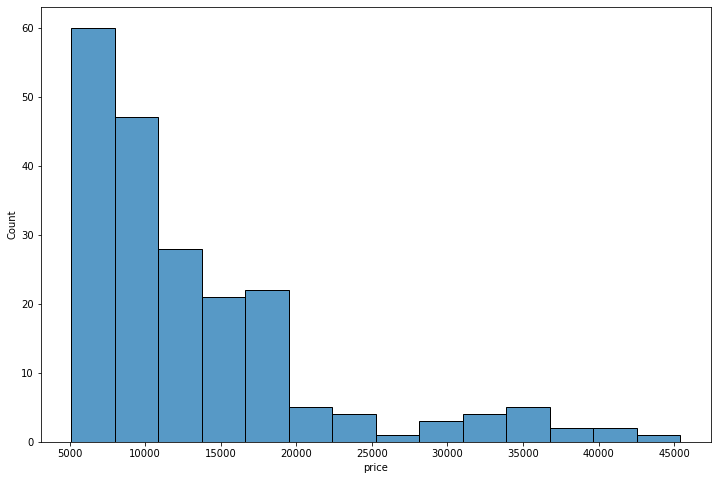

In [32]:
sns.histplot(x=data['price'])

- The distribution of the car price is positively skewed. 
- A greater number of the car price fall between 5000 to 20000

<AxesSubplot:xlabel='fueltype', ylabel='count'>

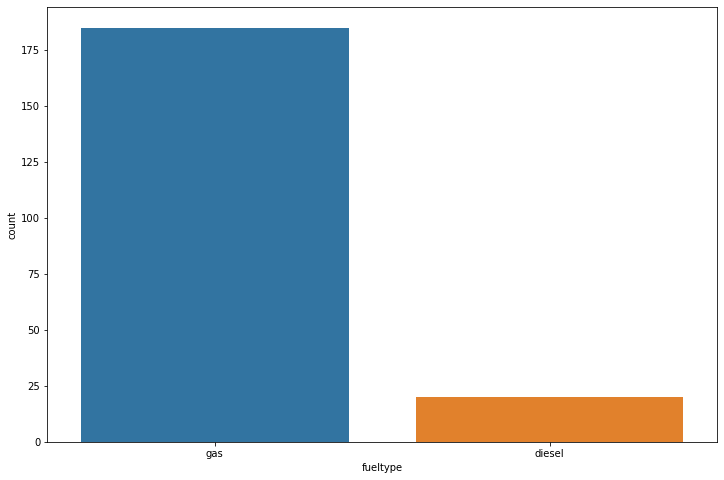

In [33]:
# categorical distributon of fuel type used

sns.countplot(x='fueltype', data=data)

- gas is the most used fueltype

<AxesSubplot:xlabel='enginetype', ylabel='count'>

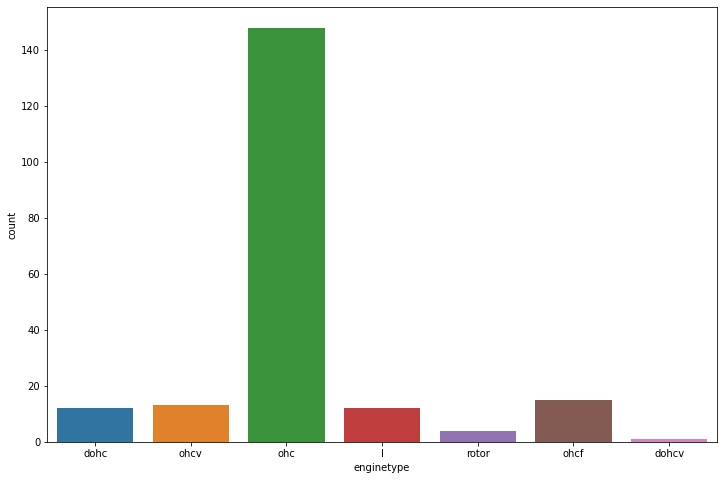

In [38]:
#univariate distribution of engine type

sns.countplot(x='enginetype', data=data)

- most of the cars run on ohc engine types

<AxesSubplot:xlabel='carbody', ylabel='count'>

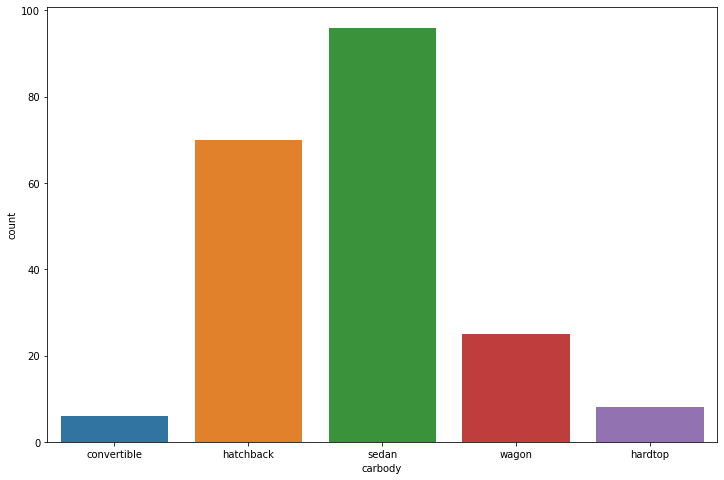

In [36]:
#univariate distribution of carbody

sns.countplot(x='carbody',data=data)

# BIVARIATE ANALYSIS

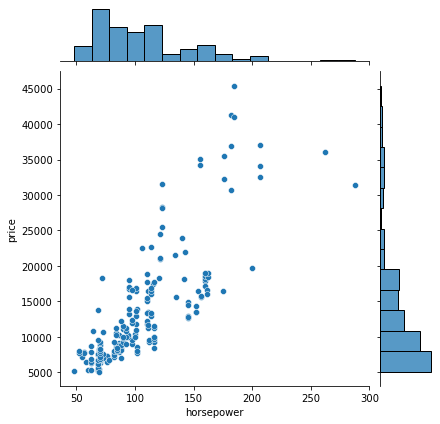

In [42]:
#Bivariate of numerical variables


sns.jointplot(x='horsepower', y='price', data=data)

- there is a positive linear relationship between the two variables. we can easily say that the most expensive cars are those with high horse power. vice versa

<AxesSubplot:xlabel='horsepower', ylabel='price'>

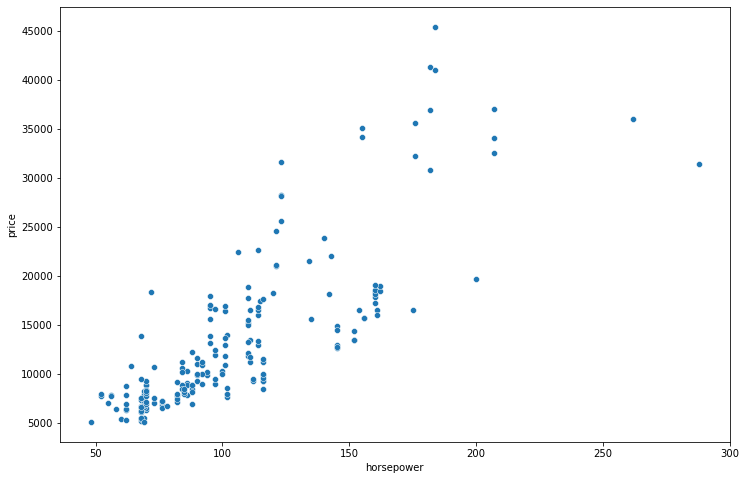

In [48]:
#Bivariate of numerical variables


sns.scatterplot(x='horsepower', y='price',data=data)

- there is a positive linear relationship between the two variables. we can easily say that the most expensive cars are those with high horse power. vice versa
- the distribution is fairly symmetrical and we can detect outliers

<AxesSubplot:xlabel='enginelocation', ylabel='price'>

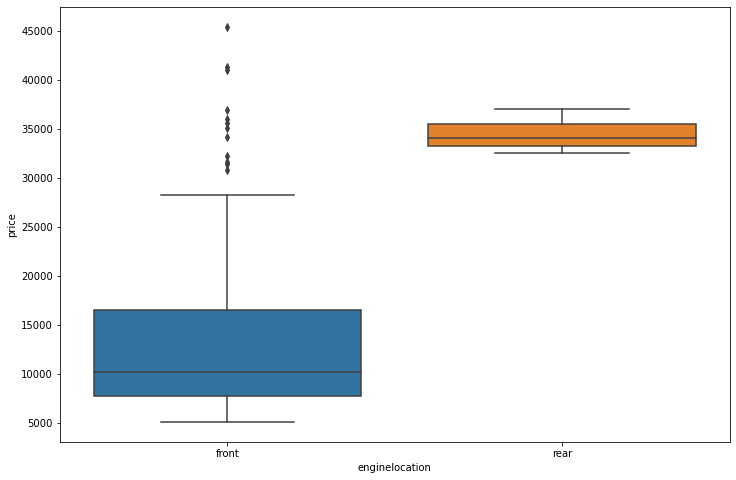

In [49]:
#Bivariate of categorical and numerical variables


sns.boxplot(x='enginelocation', y='price',data=data)

- less expensive cars ave their engines in front though there are front engine cars that are expensive. these are the outliers present
- The most expensive cars are those that have their engines rear

<AxesSubplot:xlabel='enginelocation', ylabel='enginesize'>

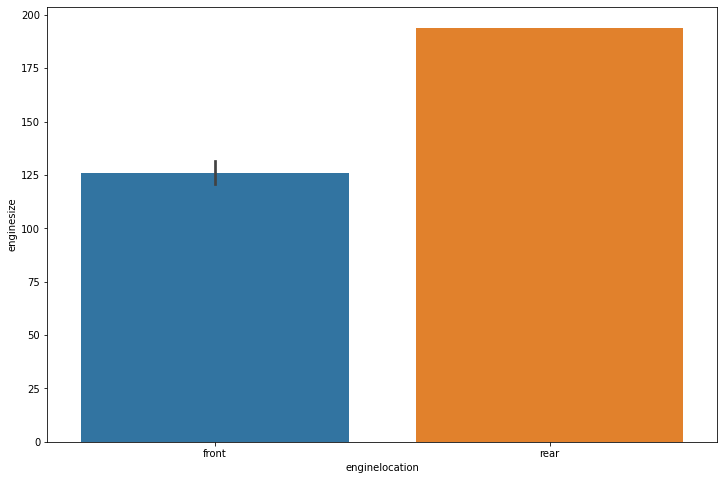

In [50]:
#Bivariate of categorical and numerical variables


sns.barplot(x='enginelocation', y='enginesize',data=data)

- Cars with big engines tend to have their engines at the rear side of the car.  

<AxesSubplot:xlabel='enginetype', ylabel='highwaympg'>

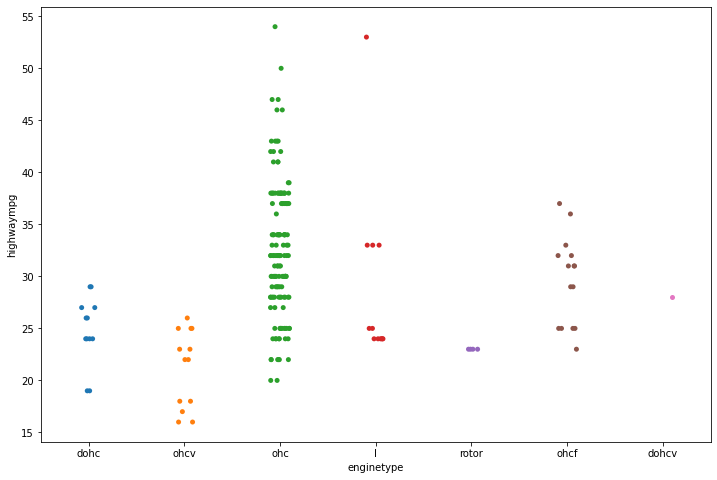

In [52]:
#relationship beween enginetype and highwympg

sns.stripplot(x='enginetype',y='highwaympg',data=data)


- ohc engine are more economical due to the high mpg indicating why they are most used based on this plot

<AxesSubplot:xlabel='carbody', ylabel='price'>

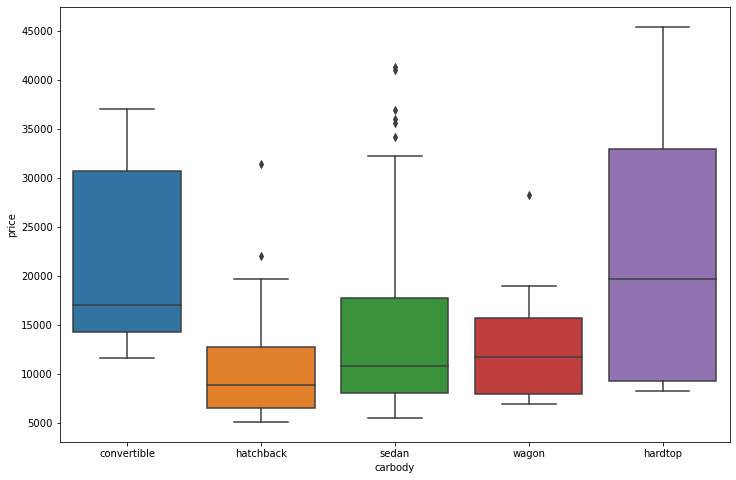

In [54]:
#relationship beween car body and price

sns.boxplot(x='carbody',y='price',data=data)

- It can be deduced that on an average  hardtop and convertable cars are more pricey. The sedan and hatchback are by far more cheaper explaining why they are more used.

# MultiVariate Analysis

<AxesSubplot:xlabel='carbody', ylabel='price'>

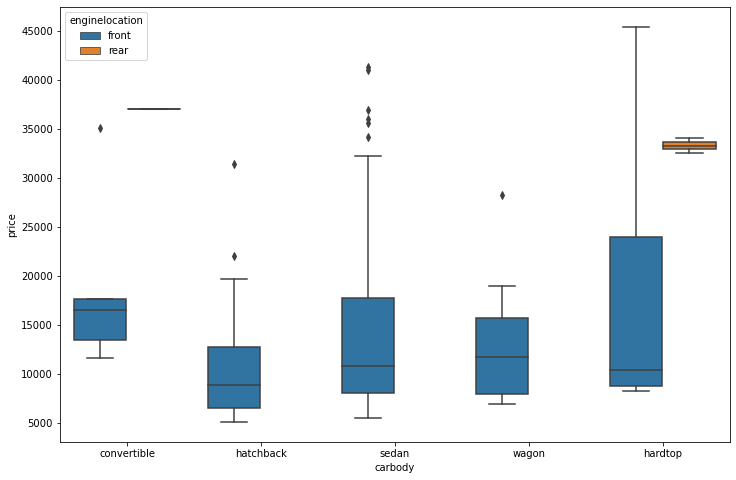

In [55]:
#relationship between carbody, enginelocation and price

sns.boxplot(x='carbody',y='price',hue='enginelocation',data=data)

<AxesSubplot:xlabel='carbody', ylabel='price'>

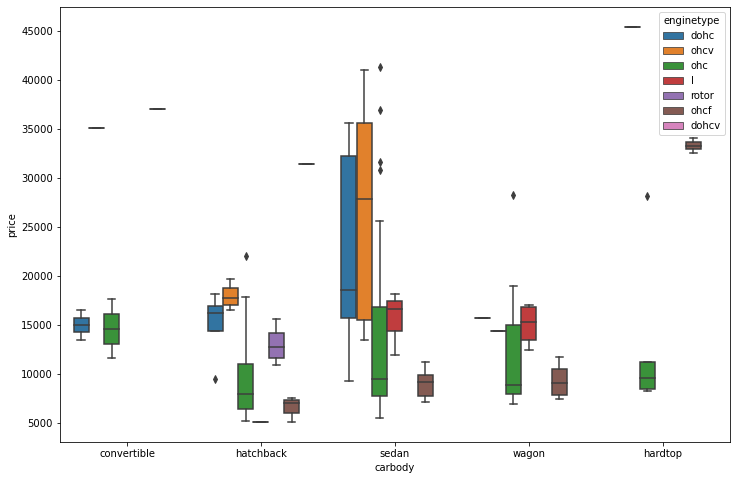

In [56]:
sns.boxplot(x='carbody',y='price',hue='enginetype',data=data)

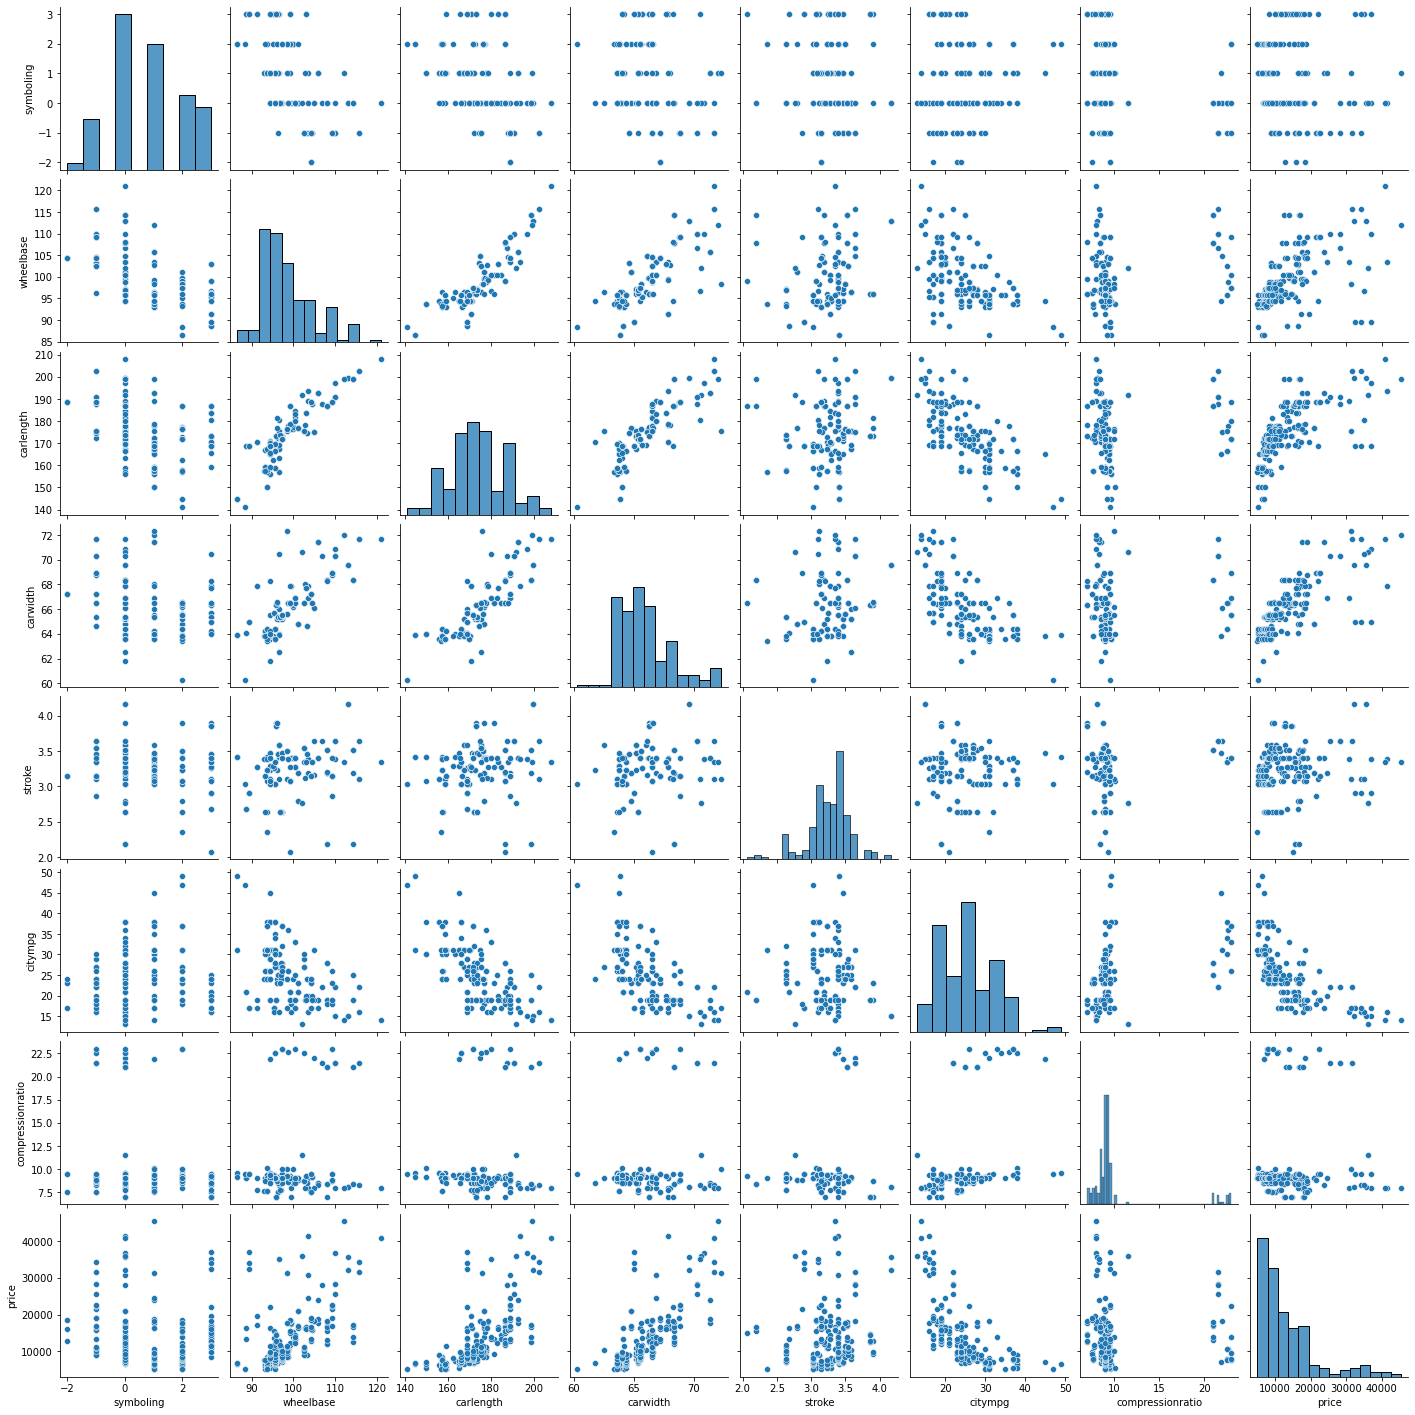

In [4]:
var = ['symboling','wheelbase','carlength','carwidth','stroke','citympg','compressionratio','price']
sns.pairplot(data[var])

<AxesSubplot:>

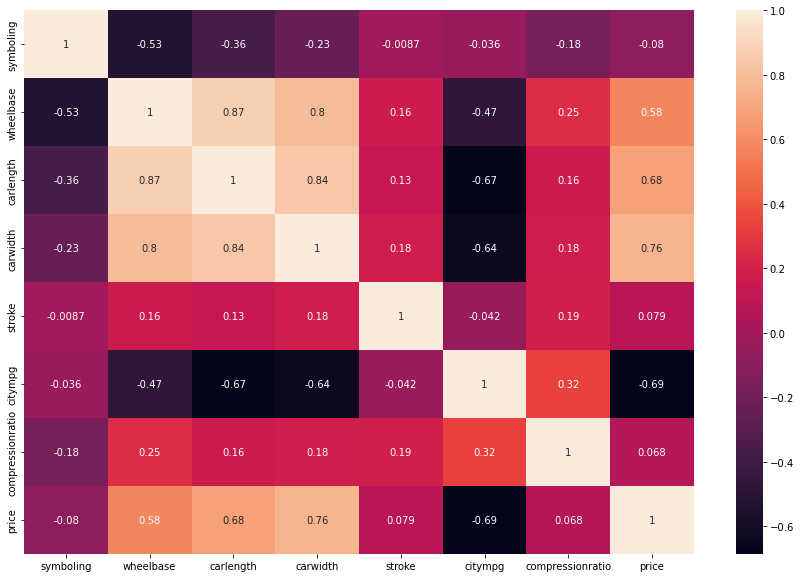

In [26]:
plt.figure(figsize=(15,10))
sns.heatmap(data[var].corr(),annot=True)

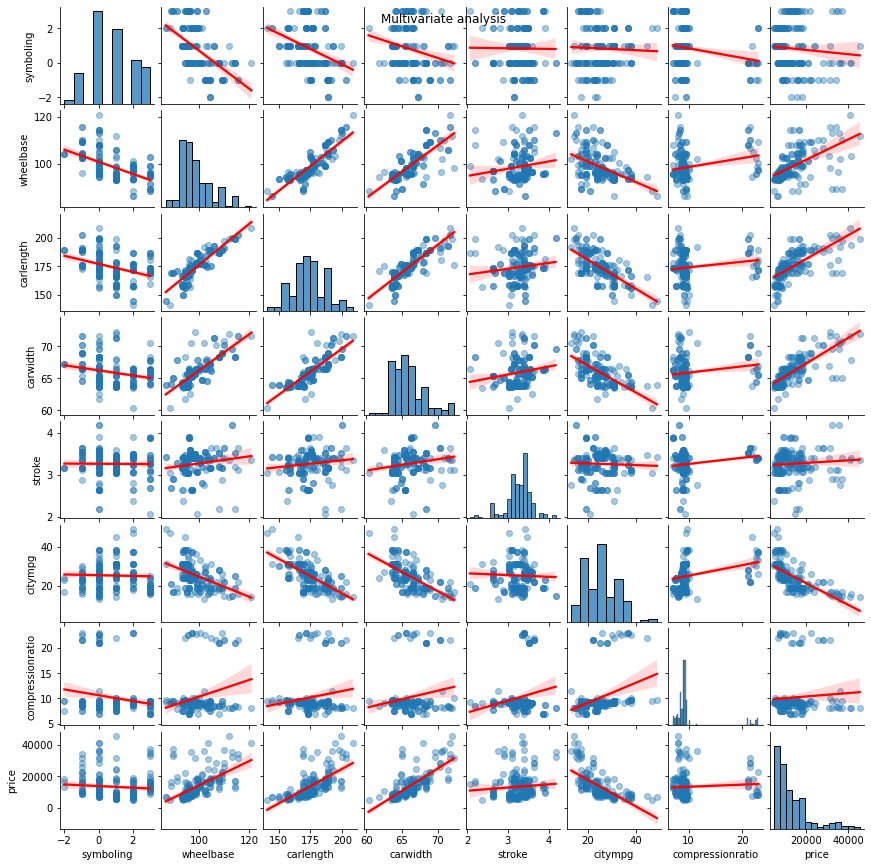

In [24]:
regplt = sns.pairplot(data[var],kind='reg',plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.4}})
regplt.fig.set_size_inches(12,12)
# plt.figure(figsize=(12,12))
regplt.fig.suptitle('Multivariate analysis');

# OVERALL SUMMARY

* According to the findings, car length, width, wheelbase, and horsepower are reliable indicators of car costs.

* City mpg should be kept to a minimum for best performance, and geely manufacturers might think about building automobiles with OHC engine types to increase their share of the market..

* To compete with other car manufacturers in Nigeria, the company should take into consideratio citympg, car length, car width, engine type and stroke, as these factors have been shown to have a strong positive correlation with car prices.